In [7]:
import numpy as np
import pandas as pd
import neurokit2 as nk
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from datasim.ecg.ecg_simulate import *
from datasim.scg.scg_simulate import *
import pywt
from utils import *

In [8]:
# scg_l = []
# for i in range(1):
#     scg = scg_simulate(duration=1000, heart_rate=70)
#     scg_l.append(scg.flatten())

In [9]:
wavelet = pywt.Wavelet('sym4')
phi, psi, x = wavelet.wavefun(level=10)

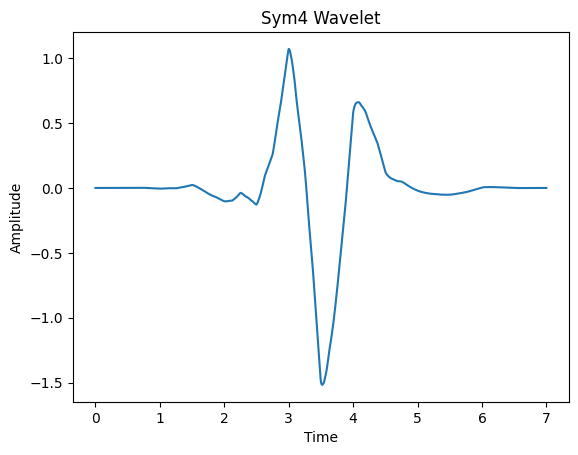

In [10]:
plt.plot(x, psi)
plt.title('Sym4 Wavelet')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [11]:
influx = {'ip':'http://172.22.112.251', 'db':'shake',
                  'user':'algtest', 'passw':'sensorweb711', 
                  'ssl':False}

In [12]:
unit = '11:01:11:01:11:01'
table_name = 'Z'

In [13]:
scg = np.random.randint(low=0, high=101, size=1000)

In [14]:
scg = scg.tolist()

In [15]:
scg[:10]

[74, 45, 52, 18, 60, 0, 77, 24, 46, 57]

In [16]:
# write_influx(influx= influx, unit=unit,table_name=table_name, data_name='value', data=scg, start_timestamp=1736862357, fs = 1/100)

In [17]:
def sine_gen (amp, samples):
    frequency = 1       # Frequency in Hz
    amplitude = amp       # Amplitude of the sine wave
    sampling_rate = samples # Sampling rate in Hz
    duration = 1        # Duration in seconds
    # Generate the time axis
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

    # Generate the sine wave
    sine_wave = amplitude * np.sin(2 * np.pi * frequency * t)
    sine_wave = np.tile(sine_wave,10)     
    return sine_wave

In [22]:
def rr_gen(in_sig, respiratory_rate):
    print(len(in_sig))
    num_points = int(in_sig.shape[0])
    x_space = np.linspace(0,1,num_points)
    seg_fre = respiratory_rate / (60/1)
    seg_amp = max(in_sig)*0.10
    rr_component = seg_amp*np.sin(2*np.pi * seg_fre * x_space)
    in_sig += rr_component

    return in_sig

410


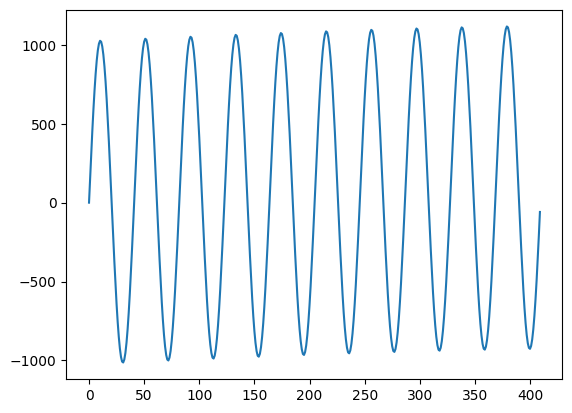

In [26]:
a = sine_gen(1024,41)
a = rr_gen(a, respiratory_rate=12)
plt.plot(a)